# Planar Data Classification

Implement a deep L-layer NN for supervised learning to plot decision boundaries for scatter plot data by the following:
* Gradient Descent
* Gradient Descent with Momentum
* Adam Optimization

with batch/ mini-batch training sets

Hyperparameters:
* Learning rate
* Mini-batch size
* Momentum $\beta_1$
* RMS Momentum $\beta_2$
* Floating point parameter $\epsilon$
* L2 Regularization parameter $\lambda$
* Dropout probability

The data is loaded from sklearn.datasets. Utility functions implementing piecemeal functions for loading the dataset and running GD including parameter initialization, forward propagation, backward propagation, cost computation and prediction is stored on mltuils.py imported at the start.

### <font color='darkblue'>1. Import Packages<font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

import warnings
warnings.filterwarnings("ignore")

from mlutils import * # utility functions
from getdata import * # load dataset functions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

### <font color='darkblue'>2. Explore the Dataset and Reshape<font>

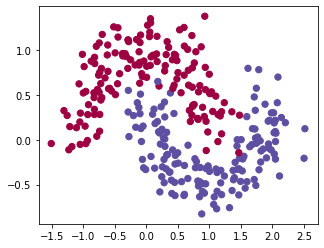

In [2]:
# Datasets
flower, noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_dataset()

datasets = {"flower": flower,
            "noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons" # choose dataset

train_x, train_y = datasets[dataset]
train_x, train_y = train_x.T, train_y.reshape(1, train_y.shape[0])

# make blobs binary
if dataset == "blobs":
    train_y = train_y%2

# Visualize the data
plt.figure(figsize=(5, 4))
plt.scatter(train_x[0, :], train_x[1, :], c=train_y, s=40, cmap=plt.cm.Spectral);

### <font color='darkblue'>3. Train L_layer Gradient Descent model<font>

In [3]:
def neural_network(X, Y, layers_dims, optimizer="gd", num_epochs=3000, mini_batch_size=64, beta1=0.9, beta2=0.999, epsilon=1e-8, print_cost=False, learning_rate=0.0007, lambd=0, keep_prob=1):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    costs = [] 
    t = 0
    seed = 10
    m = X.shape[1]
    
    # Parameters initialization. 
    parameters = initialize_parameters(layers_dims)
    
    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)

    
    for i in range(num_epochs):
        
        # Define the random minibatches. Increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost = 0
        
        for minibatch in minibatches:
            
            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
            
            # Forward propagation:       
            AL, caches = forward_prop(minibatch_X, parameters, keep_prob)
        
            # Compute cost.
            cost +=  compute_cost(AL, minibatch_Y, parameters, lambd)
    
            # Backward propagation.
            grads = back_prop(AL, minibatch_Y, caches, lambd, keep_prob)
 
            # Update parameters.
            if optimizer == "gd":
                parameters = update_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_adam(parameters, grads, v, s, t, learning_rate, beta1, beta2,  epsilon)
            ### END CODE HERE ###
                
            # Print the cost every 100 training example
        cost_avg = cost / m
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost_avg))
        if i % 100 == 0:
            costs.append(cost_avg)
            
    # plot the cost
    plt.subplot(1, 2, 1)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate =" + str(learning_rate))
    
    # Plot decision boundary
    plt.subplot(1, 2, 2)
    plt.title("Model with " + optimizer + " optimization")
    axes = plt.gca()
    plot_decision_boundary(lambda x: predict_dec(parameters, x.T, keep_prob), X, Y)
    
    # print accuracy
    pred_train = predict(X, Y, parameters, keep_prob)
    
    result = {"costs" : costs,
         "Y_prediction_train" : pred_train, 
         "keep probability" : keep_prob, 
         "regularization parameter" : lambd,
         "learning_rate" : learning_rate,
         "num_epochs": num_epochs,
         "parameters" : parameters,
         "gradients" : grads}
    
    return result

###  <font color='darkblue'>4. Use Model to Predict<font>

Accuracy:  67.0000 %


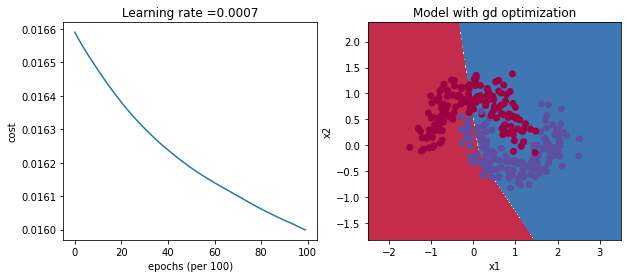

 Batch Gradient Descent with regularization took 0 min 7.08 sec

---------------------------------------------------------------------

Accuracy:  84.0000 %


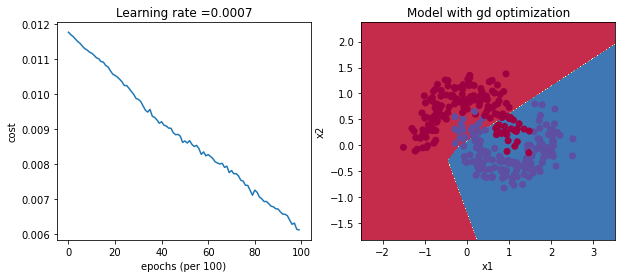

 Mini-Batch Gradient Descent took 0 min 21.59 sec

----------------------------------------------------------------------

Accuracy:  97.6667 %


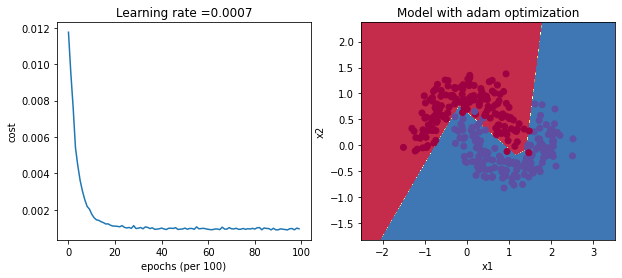

 Mini-batch Adam took 0 min 26.32 sec

----------------------------------------------------------------------



In [4]:
layers_dims = [train_x.shape[0], 5, 2, 1]
model = {}
with timer() as elapsed:
    model = neural_network(train_x, train_y, layers_dims, mini_batch_size=train_x.shape[1], num_epochs = 10000, lambd=0.7, print_cost = False)
    plt.show()
print(" Batch Gradient Descent with regularization took {:d} min {:.2f} sec".format(int(elapsed()//60), elapsed()%60))
print ('\n' + "---------------------------------------------------------------------" + '\n')

with timer() as elapsed:
    model = neural_network(train_x, train_y, layers_dims, num_epochs = 10000, print_cost = False)
    plt.show()
print(" Mini-Batch Gradient Descent took {:d} min {:.2f} sec".format(int(elapsed()//60), elapsed()%60))
print ('\n' + "----------------------------------------------------------------------" + '\n')

with timer() as elapsed:
    model = neural_network(train_x, train_y, layers_dims, optimizer="adam", num_epochs = 10000, print_cost = False)
    plt.show()
print(" Mini-batch Adam took {:d} min {:.2f} sec".format(int(elapsed()//60), elapsed()%60))
print ('\n' + "----------------------------------------------------------------------" + '\n')

### <font color='darkblue'>5. Test model hyperparameters<font>

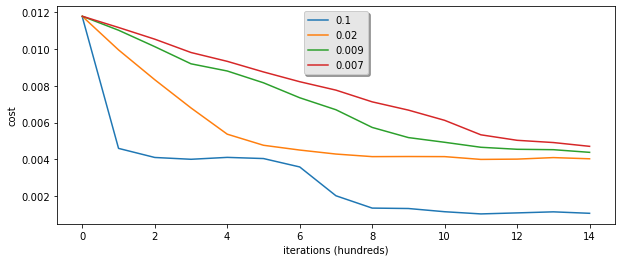

In [5]:
learning_rates = [0.1, 0.02, 0.009, 0.007]
models = {}
for i in learning_rates:
    with nostdout():
        models[str(i)] = neural_network(train_x, train_y, layers_dims, num_epochs=1500, learning_rate=i, print_cost=False)

plt.subplot(1,1,1)
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()